# Exercises 5

## Part 1

- Import the rocket image from skimage.data
- Check it's type
- Can you find a way to convert that RGB image to grayscale (hint: google skimage convert RGB to gray)
- Check the type of your gray scale image
- As we did in exercise 3 add some normal noise to your picture
- Try to filter your image with a median filter and a disk element with radius 3.
- You should get an error. Can you figure out how to solve it ?
- Plot the filtered image. What happened ?
- Find a threshold automatically to highlight bright regions in the image (e.g. Otsu threshold)
- Create a mask using that threshold and plot it
- The maks is not very good. Let's plot a histogram of our image and set a manual threshold to create a mask

## Part 2
- Clean-up your mask using a binary closing operation
- Label the binary regions in your mask
- Calculate the region properties using both the mask and the intensity image
- Create a list containing the area of each region
- Cerate a list containing the mean intensity of each region
- Plot one list as a function of the other
- Choosing appropriate thresholds on those two parameters, create a new mask that only contains regions corresponding to bright lights

# Solutions 5

## Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data

In [72]:
#load moon image
image = skimage.data.rocket()

In [110]:
image.dtype

dtype('uint8')

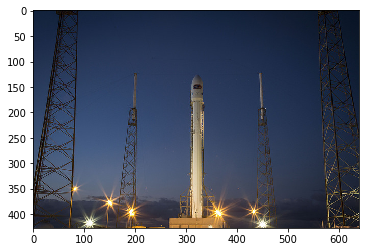

In [74]:
plt.imshow(image)
plt.show()

In [75]:
import skimage.color

In [76]:
image_gray = skimage.color.rgb2gray(image)

In [99]:
type(image_gray[0,0])

numpy.float64

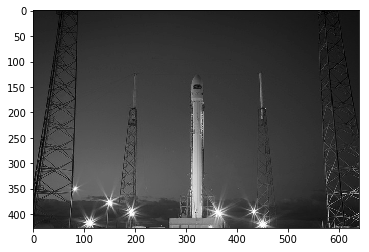

In [79]:
plt.imshow(image_gray, cmap = 'gray')
plt.show()

In [81]:
#get shape of image
image_gray.shape

(427, 640)

In [161]:
#generate normal noise
normal_matrix = np.random.randn(image_gray.shape[0], image_gray.shape[1])

#add it to the image
noisy_image = image_gray + 0.1*normal_matrix

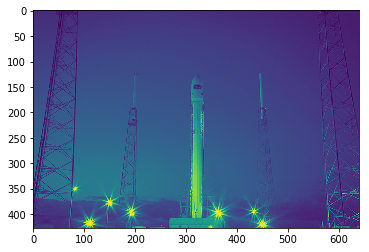

In [162]:
plt.imshow(noisy_image)
plt.show()

In [163]:
from skimage.filters import median
from skimage.morphology import disk

In [164]:
#median filter the image
image_median = median(noisy_image, selem=disk(3))

/Users/gw18g940/miniconda3/envs/teaching_test/lib/python3.6/site-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


We get an error saying that the function  only accepts values from -1 to 1 if the input is of float type. Our original image was of integer type but since we added noise, it is now float. Let's verify the help for the median function:

In [165]:
help(median)

Help on function median in module skimage.filters.rank.generic:

median(image, selem=None, out=None, mask=None, shift_x=False, shift_y=False)
    Return local median of an image.
    
    Parameters
    ----------
    image : 2-D array (uint8, uint16)
        Input image.
    selem : 2-D array, optional
        The neighborhood expressed as a 2-D array of 1's and 0's. If None, a
        full square of size 3 is used.
    out : 2-D array (same dtype as input)
        If None, a new array is allocated.
    mask : ndarray
        Mask array that defines (>0) area of the image included in the local
        neighborhood. If None, the complete image is used (default).
    shift_x, shift_y : int
        Offset added to the structuring element center point. Shift is bounded
        to the structuring element sizes (center must be inside the given
        structuring element).
    
    Returns
    -------
    out : 2-D array (same dtype as input image)
        Output image.
    
    Examples
  

So we need an uint8 or uint16 image. Let's scale the image (0-255) so that we can convert it to uint8 without saturating pixels:

In [166]:
noisy_image_int = noisy_image-noisy_image.min()
noisy_image_int = 255*noisy_image_int/noisy_image_int.max()
noisy_image_int = noisy_image_int.astype(np.uint8)

In [167]:
type(noisy_image_int[0,0])

numpy.uint8

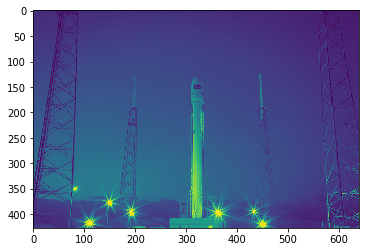

In [168]:
plt.imshow(noisy_image_int)
plt.show()

In [169]:
#median filter the image
image_median = median(noisy_image_int, selem=disk(3))

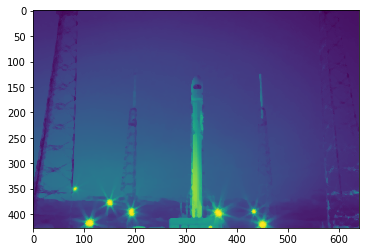

In [170]:
plt.imshow(image_median)
plt.show()

In [171]:
import skimage.filters

In [172]:
threshold = skimage.filters.threshold_otsu(image_median)
threshold

72

In [173]:
mask = image_median>threshold

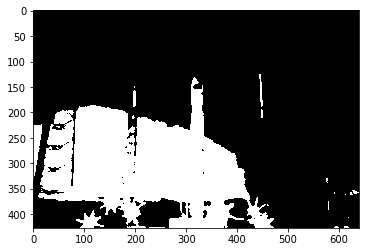

In [174]:
plt.imshow(mask, cmap = 'gray')
plt.show()

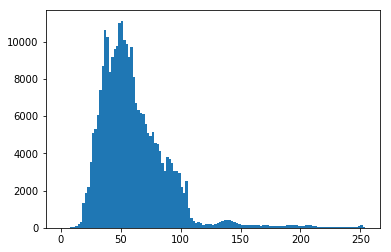

In [175]:
plt.hist(np.ravel(image_median),bins = np.arange(0,255,2))
plt.show()

There's a small dip around 140. Let's try that as a threshold:

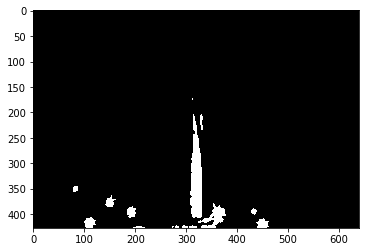

In [176]:
mask = image_median>140

plt.imshow(mask, cmap = 'gray')
plt.show()

## Part 2

In [177]:
from skimage.morphology import binary_opening, disk

In [178]:
mask_closed = binary_opening(mask, selem=disk(2))

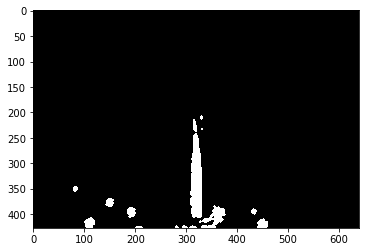

In [179]:
plt.imshow(mask_closed, cmap = 'gray')
plt.show()

In [180]:
from skimage.measure import label, regionprops

In [181]:
image_label = label(mask_closed)
regions = regionprops(image_label, image_median)

In [182]:
area = [x.area for x in regions]
mean_intensity = [x.mean_intensity for x in regions]


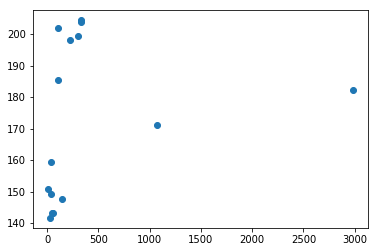

In [183]:
plt.plot(area, mean_intensity,'o')
plt.show()

In [184]:
newmaks = np.zeros(image_label.shape)
for x in regions:
    if (x.area<500) and (x.mean_intensity>160):
        newmaks[x.coords[:,0],x.coords[:,1]]=1

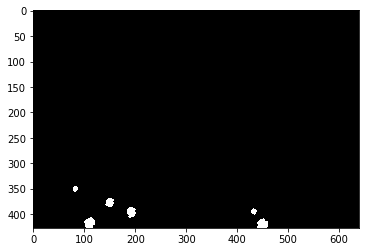

In [185]:
plt.imshow(newmaks, cmap = 'gray')
plt.show()